# Naive Bayes Classification

### Background

#### Bayes' Theorem

Let $P(A)$ and $P(B)$ be the probability of events $A$ and $B$ occurring, respectively. The conditional probability of $A$ given $B$, $P(A\mid B)$, is defined as

$$
P(A\mid B) = \frac{P(B\mid A)P(A)}{P(B)}
$$

where $P(B\mid A)$ is the conditional probability of $A$ given $B$. In Bayesian statistics, $P(A)$ and $P(B)$ are called the prior probabilities of events $A$ and $B$, $P(B\mid A)$ the likelihood of $B$ given $A$, and $P(A\mid B)$ the posterior probability of $A$ given $B$. 

#### The Naive Independence: Conditional Independence

As the number of features increases, calculating $P(B\mid A)$ directly becomes computationally challenging. The Naive Bayes algorithm, as the name suggests, "naively" assumes that all features are conditionally independent on each other given $A$. That is, if a random variable $X$ consists of $p$ features, $X=(X_1,\cdots, X_p)\in\mathbb R^p$ and its components conditionally independent on $Y$, we have

$$
\begin{align*}
    P(X\mid Y) 
    &= P(X_1,\cdots, X_p \mid Y) = P(X_1\mid Y)P(X_2\mid Y)\cdots P(X_p\mid Y)
    \\
    &= \prod_{i=1}^p P(X_i\mid Y).
\end{align*}
$$

Obviously, in many real-world scenarios, features are not truly independent. For instance, in text classification, the presence of one word can often influence the probability of another word appearing. However, despite this simplifying assumption, the Naive Bayes classifier often performs surprisingly well in practice, especially when dealing with high-dimensional data.

### The Naive Bayes Classification Process

Given a data point $x = (x_1, x_2, ..., x_p)$, the Naive Bayes classifier aims to predict the class label $y^*$ defined as

$$
y^* = \arg\max_{y}P(y\mid x).
$$

Using Bayes' theorem and conditional independence asusmption we can express the above as:

$$
\begin{align*}
y^* 
&= \arg\max_{y}P(y\mid x)
\\
&= \arg\max_{y}\frac{P(x\mid y)P(y)}{P(x)}
\\
&= \arg\max_{y}\frac{P(y)}{P(x)}\prod_{i=1}^p P(x_i\mid y)
\\
&= \arg\max_{y}P(y)\prod_{i=1}^p P(x_i\mid y)
\end{align*}
$$

where from the third to the fourth line, we ignore $P(x)$ in the denominator as it is constant for all classes. That is, we assign a data point $x$ to the class with the highest posterior probability.

To implement a Naive Bayes classifier, we need to estimate the prior probabilities $P(y)$ for each class and the conditional probabilities $P(x_i\mid y)$ for $i=1,\cdots, p$. In the case of a discrete categorical feature, we estimate $P(x_i = v \mid y)$ as the proportion of data points in class $y$ that have the value $v$ for feature $x_i$. For a continuous feature, on the other hand, we typically assume a probability distribution for the feature within each class. Although other distributions can also be assumed depending on the characteristics of the data, normally we assume the feature to follow a Gaussian distribution, in which case we estimate the mean ($\mu_{i,y}$) and variance ($\sigma^2_{i,y}$) of the feature $x_i$ for each class $y$ from the training data. Then, the conditional probability $P(x_i\mid y)$ is given by the probability density function of the Gaussian distribution:

$$
P(x_i\mid y) = \frac{1}{\sqrt{2\pi\sigma^2_{i,y}}} \exp\left(-\frac{(x_i - \mu_{i,y})^2}{2\sigma^2_{i,y}}\right)
$$

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

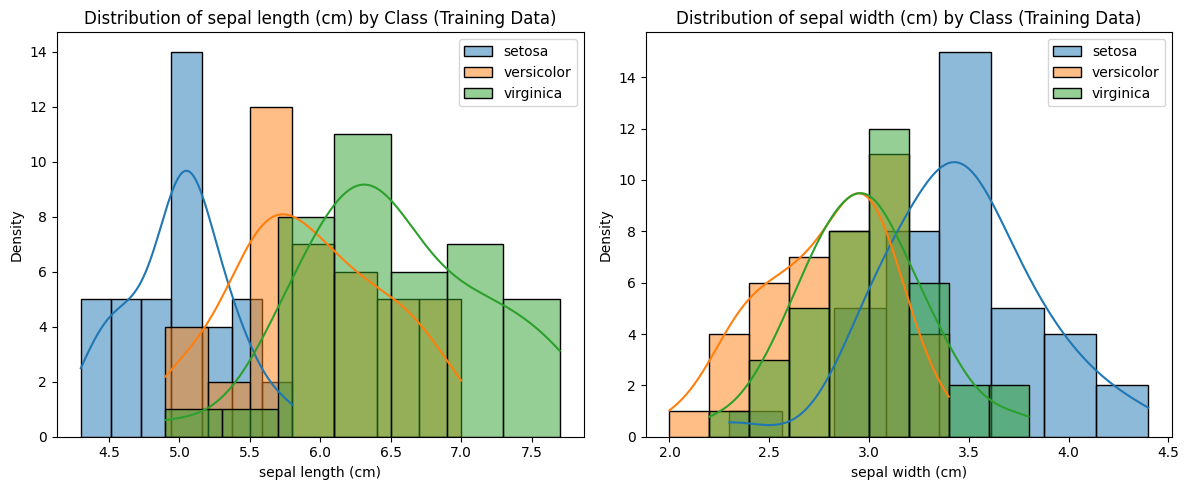

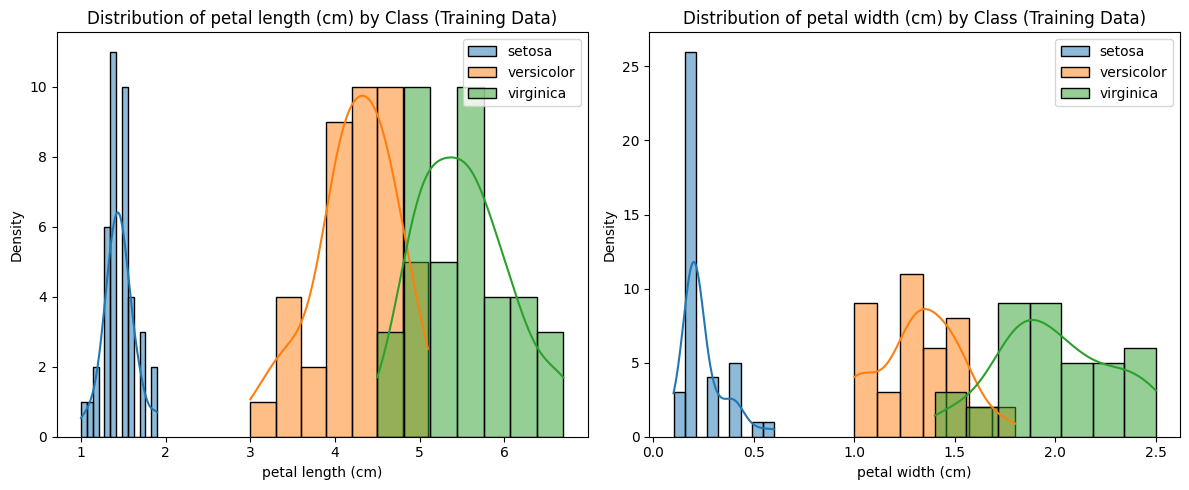

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  
X_1 = X[:, :2] # Using only the first two features for easy visualization
X_2 = X[:, 2:] # Using only the last two features for easy visualization
y = iris.target
class_names = iris.target_names

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_1 = X_train[:, :2]
X_train_2 = X_train[:, 2:]
X_test_1 = X_test[:, :2]
X_test_2 = X_test[:, 2:]

# Visualisation of Class Distributions
plt.figure(figsize=(12, 5))
for i, feature_name in enumerate(iris.feature_names[:2]):
    plt.subplot(1, 2, i + 1)
    for target_class in np.unique(y_train):
        subset = X_train_1[y_train == target_class, i]
        sns.histplot(subset, kde=True, label=class_names[target_class])
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature_name} by Class (Training Data)')
    plt.legend()
plt.tight_layout()

plt.figure(figsize=(12, 5))
for i, feature_name in enumerate(iris.feature_names[2:]):
    plt.subplot(1, 2, i + 1)
    for target_class in np.unique(y_train):
        subset = X_train_2[y_train == target_class, i]
        sns.histplot(subset, kde=True, label=class_names[target_class])
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature_name} by Class (Training Data)')
    plt.legend()
plt.tight_layout()
plt.show()

In [3]:
# Initialise the Gaussian Naive Bayes classifier
gnb_1 = GaussianNB()
gnb_2 = GaussianNB()

# Train the classifier
gnb_1.fit(X_train_1, y_train)
gnb_2.fit(X_train_2, y_train)

# Make predictions on the test set
y_pred_1 = gnb_1.predict(X_test_1)
y_pred_2 = gnb_2.predict(X_test_2)

# Evaluate the model
accuracy_1 = accuracy_score(y_test, y_pred_1)
accuracy_2 = accuracy_score(y_test, y_pred_2)
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
class_report_1 = classification_report(y_test, y_pred_1, target_names=class_names)
class_report_2 = classification_report(y_test, y_pred_2, target_names=class_names)

print(f"Comparing Accuracy of the two Naive Bayes classifiers: {accuracy_1:.2f} vs {accuracy_2:.2f}")
print("\nClassification Report of the First Classifier:")
print(class_report_1)
print("\nClassification Report of the Second Classifier:")
print(class_report_2)

Comparing Accuracy of the two Naive Bayes classifiers: 0.90 vs 1.00

Classification Report of the First Classifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Classification Report of the Second Classifier:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



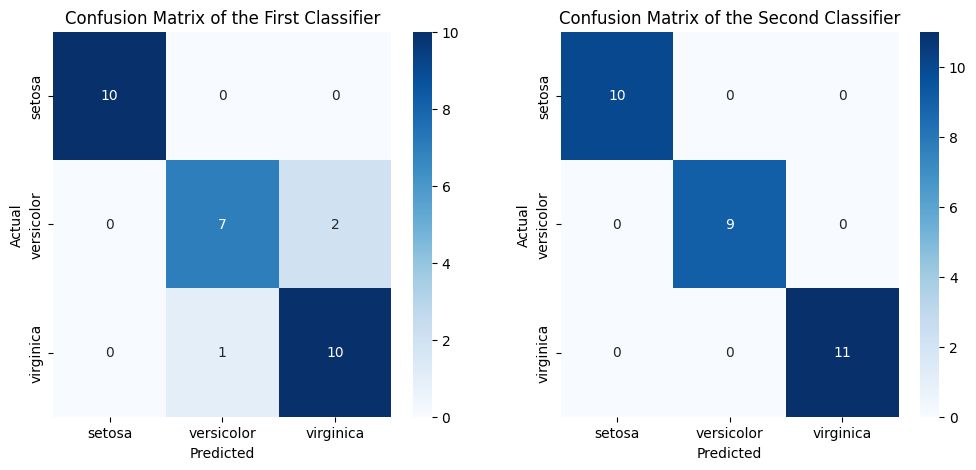

In [4]:
# Visualisation of Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0] = sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=ax[0])
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
ax[0].set_title('Confusion Matrix of the First Classifier')

ax[1] = sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=ax[1])
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
ax[1].set_title('Confusion Matrix of the Second Classifier')
plt.show()

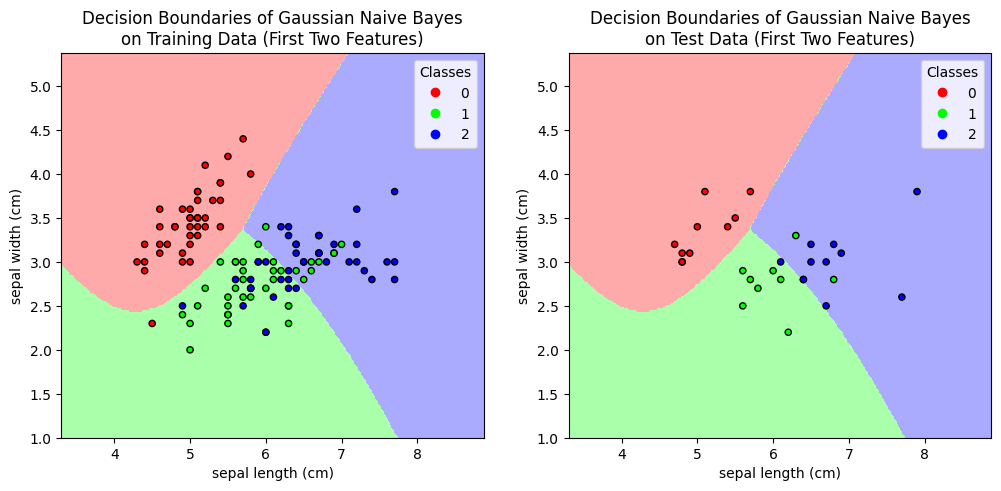

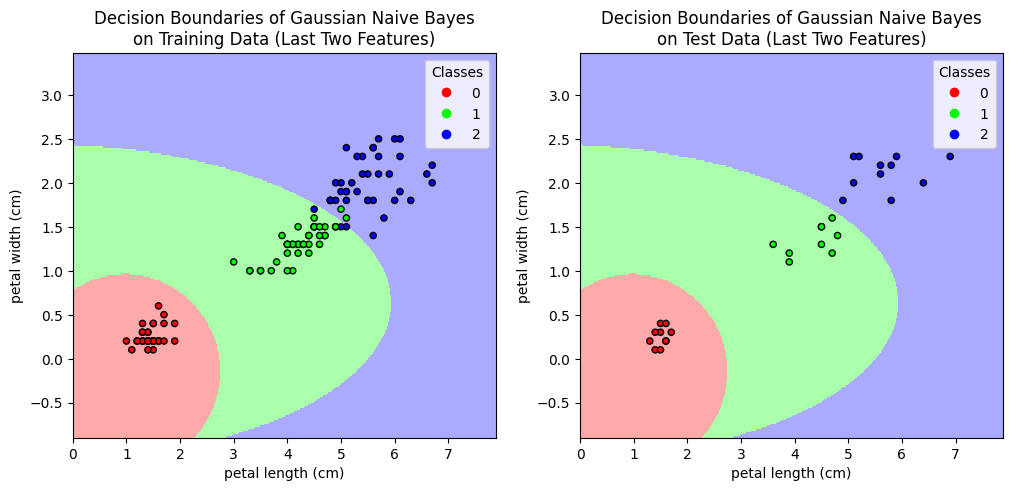

In [5]:
# Create a color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# step size in the mesh
h = .02

# Visualisation of decision boundaries
x_1_min, x_1_max = X_1[:, 0].min() - 1, X_1[:, 0].max() + 1
y_1_min, y_1_max = X_1[:, 1].min() - 1, X_1[:, 1].max() + 1
xx_1, yy_1 = np.meshgrid(np.arange(x_1_min, x_1_max, h), np.arange(y_1_min, y_1_max, h))

x_2_min, x_2_max = X_2[:, 0].min() - 1, X_2[:, 0].max() + 1
y_2_min, y_2_max = X_2[:, 1].min() - 1, X_2[:, 1].max() + 1
xx_2, yy_2 = np.meshgrid(np.arange(x_2_min, x_2_max, h), np.arange(y_2_min, y_2_max, h))

# Predict the class for each point in the meshgrid
Z_1 = gnb_1.predict(np.c_[xx_1.ravel(), yy_1.ravel()])
Z_1 = Z_1.reshape(xx_1.shape)
Z_2 = gnb_2.predict(np.c_[xx_2.ravel(), yy_2.ravel()])
Z_2 = Z_2.reshape(xx_2.shape)

# Plot the training points
fig1, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].contourf(xx_1, yy_1, Z_1, cmap=cmap_light)
scatter_1 = ax[0].scatter(X_train_1[:, 0], X_train_1[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label=class_names)
ax[0].set_xlim(xx_1.min(), xx_1.max())
ax[0].set_ylim(yy_1.min(), yy_1.max())
ax[0].set_xlabel(iris.feature_names[0])
ax[0].set_ylabel(iris.feature_names[1])
ax[0].set_title("Decision Boundaries of Gaussian Naive Bayes\non Training Data (First Two Features)")
ax[0].legend(*scatter_1.legend_elements(), title="Classes")

ax[1].contourf(xx_1, yy_1, Z_1, cmap=cmap_light)
ax[1].scatter(X_test_1[:, 0], X_test_1[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20, label=class_names)
ax[1].set_xlim(xx_1.min(), xx_1.max())
ax[1].set_ylim(yy_1.min(), yy_1.max())
ax[1].set_xlabel(iris.feature_names[0])
ax[1].set_ylabel(iris.feature_names[1])
ax[1].set_title("Decision Boundaries of Gaussian Naive Bayes\non Test Data (First Two Features)")
ax[1].legend(*scatter_1.legend_elements(), title="Classes")


fig2, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].contourf(xx_2, yy_2, Z_2, cmap=cmap_light)
scatter_2 = ax[0].scatter(X_train_2[:, 0], X_train_2[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label=class_names)
ax[0].set_xlim(xx_2.min(), xx_2.max())
ax[0].set_ylim(yy_2.min(), yy_2.max())
ax[0].set_xlabel(iris.feature_names[2])
ax[0].set_ylabel(iris.feature_names[3])
ax[0].set_title("Decision Boundaries of Gaussian Naive Bayes\non Training Data (Last Two Features)")
ax[0].legend(*scatter_2.legend_elements(), title="Classes")

ax[1].contourf(xx_2, yy_2, Z_2, cmap=cmap_light)
ax[1].scatter(X_test_2[:, 0], X_test_2[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20, label=class_names)
ax[1].set_xlim(xx_2.min(), xx_2.max())
ax[1].set_ylim(yy_2.min(), yy_2.max())
ax[1].set_xlabel(iris.feature_names[2])
ax[1].set_ylabel(iris.feature_names[3]) 
ax[1].set_title("Decision Boundaries of Gaussian Naive Bayes\non Test Data (Last Two Features)")
ax[1].legend(*scatter_2.legend_elements(), title="Classes")

plt.show()